# Data Understanding & Preparation

Segnali generali:
- tBodyAcc-XYZ
- tGravityAcc-XYZ
- tBodyAccJerk-XYZ
- tBodyGyro-XYZ
- tBodyGyroJerk-XYZ
- tBodyAccMag
- tGravityAccMag
- tBodyAccJerkMag
- tBodyGyroMag
- tBodyGyroJerkMag
- fBodyAcc-XYZ
- fBodyAccJerk-XYZ
- fBodyGyro-XYZ
- fBodyAccMag
- fBodyAccJerkMag
- fBodyGyroMag
- fBodyGyroJerkMag

Nuove variabili stimate a partire dai segnali precedenti = stima delle seguenti proprietà su ciascun segnale:
- mean(): Mean value
- std(): Standard deviation
- mad(): Median absolute deviation
- max(): Largest value in array
- min(): Smallest value in array
- sma(): Signal magnitude area
- energy(): Energy measure. Sum of the squares divided by the number of values.
- iqr(): Interquartile range
- entropy(): Signal entropy
- arCoeff(): Autorregresion coefficients with Burg order equal to 4
- correlation(): correlation coefficient between two signals
- maxInds(): index of the frequency component with largest magnitude
- meanFreq(): Weighted average of the frequency components to obtain a mean - - frequency
- skewness(): skewness of the frequency domain signal
- kurtosis(): kurtosis of the frequency domain signal
- bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.
- angle(): Angle between to vectors

Altri vettori ottenuti tramite la media dei segnali (angle):
- gravityMean
- tBodyAccMean
- tBodyAccJerkMean
- tBodyGyroMean
- tBodyGyroJerkMean

Y_labels:
- WALKING as 1
- WALKING_UPSTAIRS as 2
- WALKING_DOWNSTAIRS as 3
- SITTING as 4
- STANDING as 5
- LAYING as 6

Dataset utilizzato (i nomi delle varaibili sono presenti in features.txt:
- *Train Data*
    - data/train/X_train.txt
    - data/train/subject_train.txt
    - data/train/y_train.txt
- *Test Data*
    - data/test/X_test.txt
    - data/test/subject_test.txt
    - data/test/y_test.txt

Possibili task da predire: 
- attività svolta (activity)
- se stazionaria o dinamica
- il soggetto che svolge l'attività (subject)

Nel secondo caso possiamo concentrarci sulla variabile **Magnitude (acc|gyro) Mean** che ci dice quanto velocemente cambia la velocità di un soggetto nel compiere l'attività ===> variabile che permette di discriminare tra attività dinamiche o stazionarie

Vettore di 561 features 

## Verifico presenza di duplicati e modifico nomi a colonne

In [1]:
# verifica che non ci siano duplicati in una lista
def check_duplicates(list_to_check):
    unique_val = {}
    dict_features = {}
    for el in list_to_check:
        if el not in unique_val:
            unique_val[el] = 1
        else:
            unique_val[el] +=1
    duplicates = [el for (el, occ) in unique_val.items() if occ > 1]
    return duplicates

In [39]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

# get the features from the file features.txt
features = list()
with open('data/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))


No of Features: 561


In [40]:
len(set(features))
duplicates = check_duplicates(features)
[duplicate for duplicate in duplicates]

['fBodyAcc-bandsEnergy()-1,8',
 'fBodyAcc-bandsEnergy()-9,16',
 'fBodyAcc-bandsEnergy()-17,24',
 'fBodyAcc-bandsEnergy()-25,32',
 'fBodyAcc-bandsEnergy()-33,40',
 'fBodyAcc-bandsEnergy()-41,48',
 'fBodyAcc-bandsEnergy()-49,56',
 'fBodyAcc-bandsEnergy()-57,64',
 'fBodyAcc-bandsEnergy()-1,16',
 'fBodyAcc-bandsEnergy()-17,32',
 'fBodyAcc-bandsEnergy()-33,48',
 'fBodyAcc-bandsEnergy()-49,64',
 'fBodyAcc-bandsEnergy()-1,24',
 'fBodyAcc-bandsEnergy()-25,48',
 'fBodyAccJerk-bandsEnergy()-1,8',
 'fBodyAccJerk-bandsEnergy()-9,16',
 'fBodyAccJerk-bandsEnergy()-17,24',
 'fBodyAccJerk-bandsEnergy()-25,32',
 'fBodyAccJerk-bandsEnergy()-33,40',
 'fBodyAccJerk-bandsEnergy()-41,48',
 'fBodyAccJerk-bandsEnergy()-49,56',
 'fBodyAccJerk-bandsEnergy()-57,64',
 'fBodyAccJerk-bandsEnergy()-1,16',
 'fBodyAccJerk-bandsEnergy()-17,32',
 'fBodyAccJerk-bandsEnergy()-33,48',
 'fBodyAccJerk-bandsEnergy()-49,64',
 'fBodyAccJerk-bandsEnergy()-1,24',
 'fBodyAccJerk-bandsEnergy()-25,48',
 'fBodyGyro-bandsEnergy()-1,8'

In [41]:
duplicates = check_duplicates(features)
j = 0
for i, feat in enumerate(features):
    if feat in duplicates:
        features[i] = feat + '_' + str(j)
        j += 1
        
duplicates = check_duplicates(features)
[duplicate for duplicate in duplicates]

[]

In [42]:
features

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

# Trainset

In [ ]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('data/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('data/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('data/train/y_train.txt', names=['Activity'], squeeze=True)
#y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
#train['ActivityName'] = y_train_labels
train.sample()

In [44]:
train.shape

(7352, 564)

# Testset

In [45]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('data/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('data/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('data/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2103,0.268314,-0.017911,-0.104036,-0.981793,-0.988552,-0.98852,-0.983289,-0.987272,-0.988266,-0.922658,...,-0.170735,-0.087508,-0.035813,-0.39537,0.433226,-0.299841,-0.695808,18,6,LAYING


In [46]:
test.shape

(2947, 564)

# Data Understanding

- Ci sono principalmente features relative all'accelerazione e al giroscopio
- le features sono numeriche 

In [48]:
from collections import Counter
# Group and count main names of columns
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)


,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


# Data cleaning

1. 0 duplicati
2. 0 valori nulli

In [50]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [51]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

## Verificare imbalanced

In [14]:
data = pd.concat([train , test])

In [50]:
train['ActivityName'].groupby(train['ActivityName']).count()

ActivityName
LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
Name: ActivityName, dtype: int64

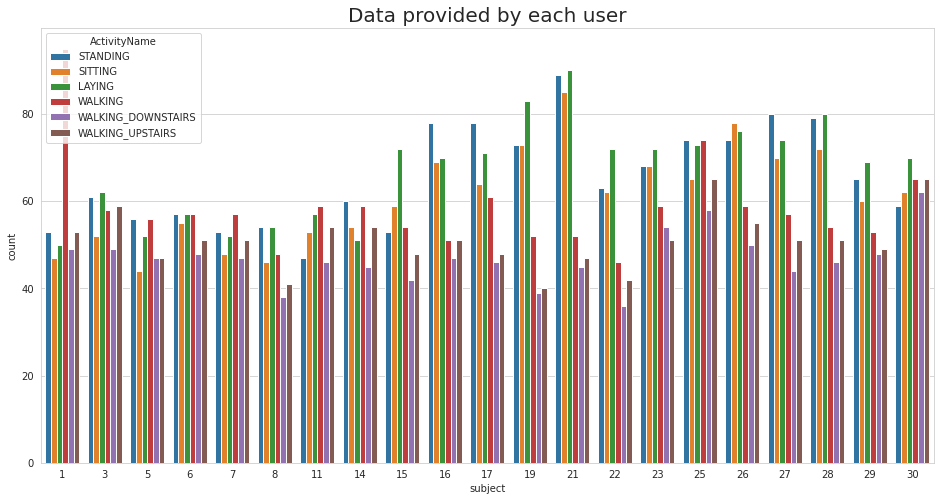

In [53]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

In [51]:
fig = px.pie(train, names='ActivityName',width=1200)
fig.show()

Ci sono stessi valori per ciascun soggetto: quindi non ci sono significative differenze

C:\Users\info\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


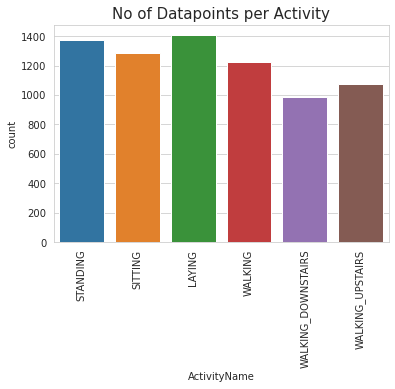

In [54]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

Si può vedere che il dataset è abbastanza bilanciato:
- WAKLKING_DOWNSTAIRS più basso

## Modifica nomi colonne

In [26]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')
train.columns = columns
test.columns = columns

test.columns
train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

In [56]:
train.to_csv('data/csv_files/train.csv', index=False)
test.to_csv('data/csv_files/test.csv', index=False)

# Data Understanding

- Acceleration is simply a rate of *change of velocity*.

- So the magnitude tells you, *how quickly velocity changes*.

Le features di questo dataset provengono da accelerometro e giroscopio (segnali 3 assiali):
- Acc = 345
- Gyro = 213
- other = 5

In [28]:
Acc=0
Gyro=0
other=0
for i in data.columns:
    if 'Acc'in i:
        Acc=Acc+1
    elif 'Gyro'in i:
        Gyro=Gyro+1
    else:
        other=other+1

px.bar(x=['Accelerometer ','Gyroscope ','other'],y=[Acc,Gyro,other],color=[Acc,Gyro,other])        

## Features Acc

### Feature Engineering from domain knowledge

- In attività statiche (sit, stand, lie down) le info su movimento ACC sono inutili
- In attività dinamiche (Walking, wupstairs, wdownstairs) sarà impo

###  Attività stazionarie e di movimento sono completamente differenti

C:\Users\info\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\info\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\info\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

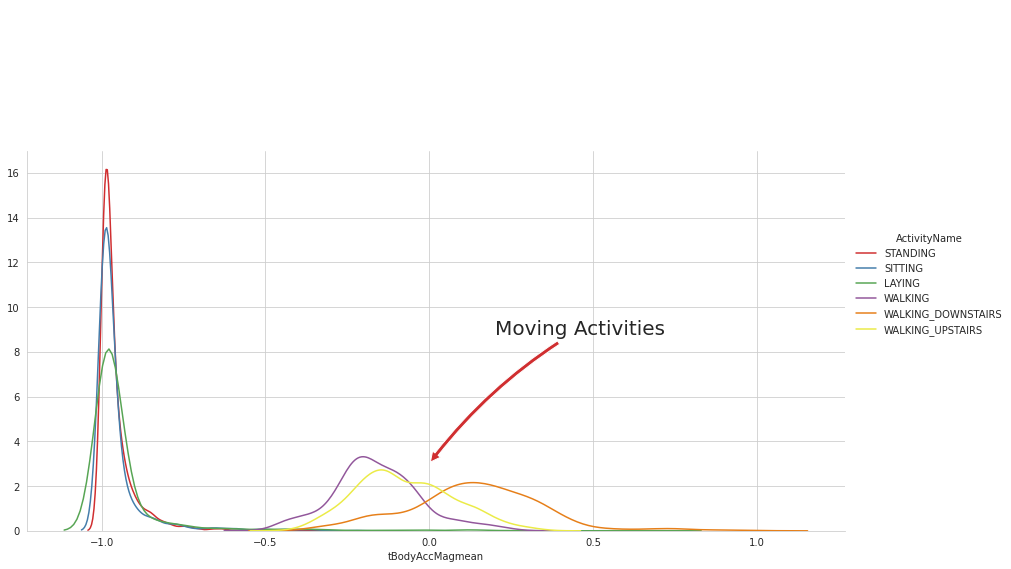

In [76]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', height=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()

plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

C:\Users\info\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\info\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\info\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

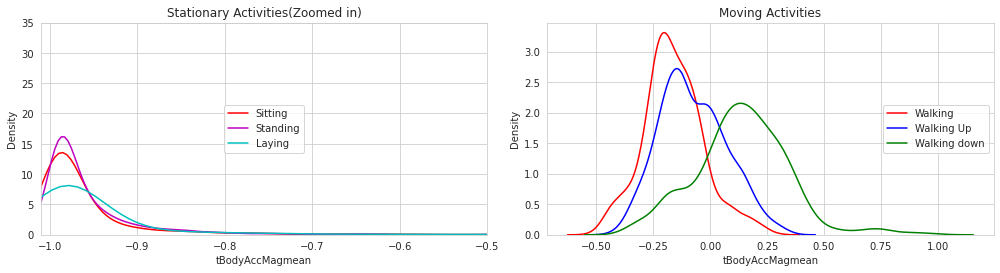

In [63]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

## Magnitude of an acceleration can saperate it well

**tBodyAccMag-mean()**

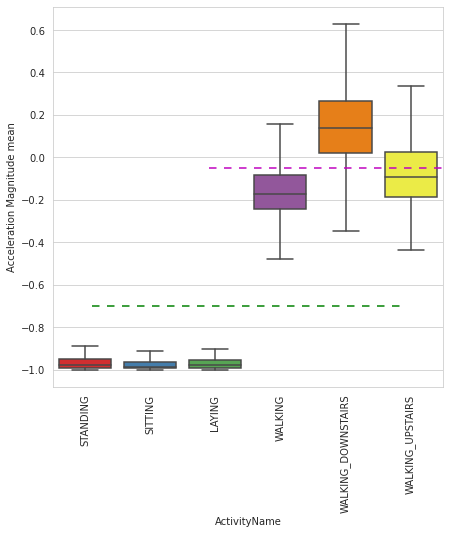

In [62]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

In generale possiamo separare le attività dinamiche da quelle statiche

Possimao poi separare ulteriormente attività statiche da quelle dinamiche

if(tBodyAccMag-mean()<=-0.8):
    Activity = "static"
if(tBodyAccMag-mean()>=-0.6):
    Activity = "dynamic"

if(tBodyAccMag-mean()>0.02):
    Activity = "WALKING_DOWNSTAIRS"
else:
    Activity = "others"

#### Osservazioni:

- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

**N.B** But still 25% of WALKING_DOWNSTAIRS observations are below 0.02 which are misclassified as others so this condition makes an error of 25% in classification.

## 4. Position of GravityAccelerationComponants also matters

**angle(X,gravityMean)**

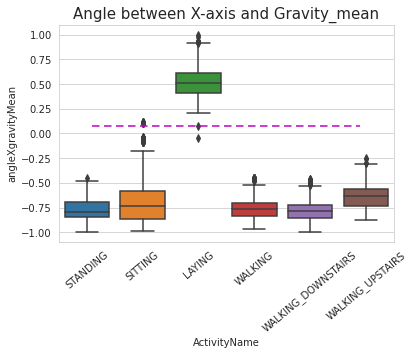

In [58]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

E' possibile separare LAYING dalle altre attività

### Osservazioni:

- If angleX,gravityMean > 0 then Activity is Laying.
- We can classify all datapoints belonging to Laying activity with just a single if else statement.

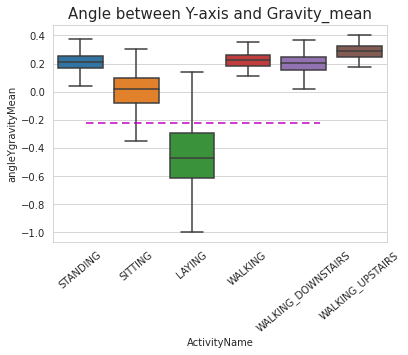

In [59]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

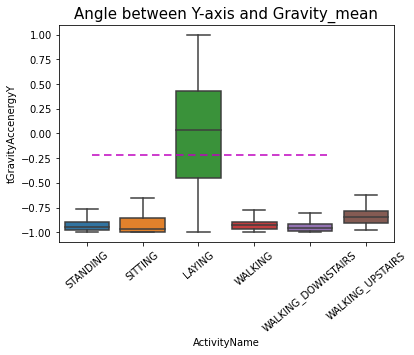

In [32]:
sns.boxplot(x='ActivityName', y='tGravityAccenergyY', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

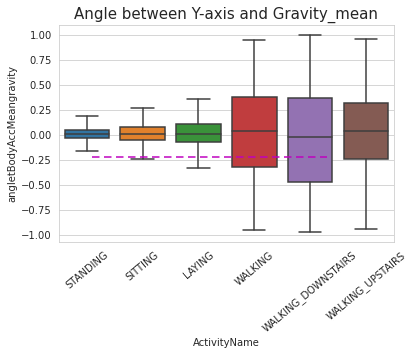

In [84]:
sns.boxplot(x='ActivityName', y='angletBodyAccMeangravity', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

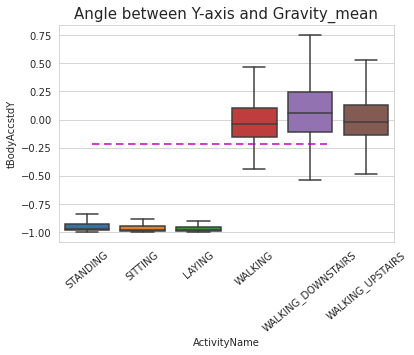

In [68]:
sns.boxplot(x='ActivityName', y='tBodyAccstdY', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()